In [1]:
import pickle

In [2]:
with open('test.pkl', 'rb') as f:
    test = pickle.load(f)

In [5]:
with open('train.pkl', 'rb') as f:
    train = pickle.load(f)

In [6]:
print(train[0].prompt)

How much does this cost to the nearest dollar?

Quoizel TRG1710BN Trilogy Glass Lantern Semi Flush Mount Ceiling Lighting, 1-Light, 60 Watt, Brushed Nickel (9"H x 10"W)
One Light Semi Flush Mount from the Trilogy collection Item Size Length 10 00 inches Height 9 28 inches Width 10 00 inches Style Transitional Light Type Semi-Flush Mount
TRILOGY SEMI FLUSH MOUNT LIGHT DIMENSIONS 928 High x 10 Wide Weight 29 LBS Ceiling Canopy 5 Dia
MEDIUM BASE LIGHT SOCKET 60 Watt Edison-Type Incandescent Bulb Bulbs Included E26 Socket Compatible with Incandescent CFL Halogen or LED Bulbs Full Range Dimming when used with Dimmable Bulb and Dimmer Switch
INSTALLATION Hardware

Price is $175.99


In [7]:
train_500 = train[:500]
print(len(train_500))

500


In [15]:
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [19]:
prices = [it.price for it in train_500]
# min_p = int(min(prices))
# max_p = int(max(prices))
counter = Counter()
for p in prices:
    intp = int(p)
    counter[intp] += 1
values = [counter[key] for key in counter.keys()]

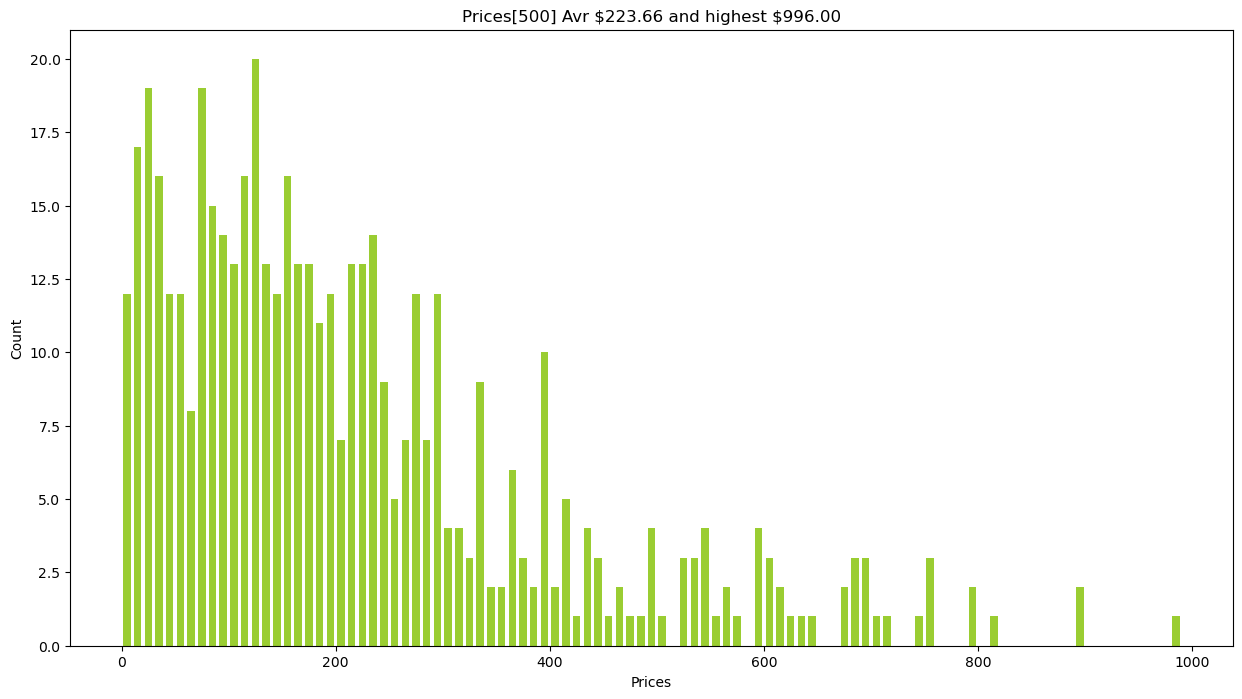

In [29]:
plt.figure(figsize=(15, 8))
plt.title(f'Prices[{len(prices)}] Avr \${sum(prices)/len(prices):,.2f} and highest \${max(prices):,.2f}')
plt.xlabel('Prices')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color='yellowgreen', bins=range(0, 1000, 10))
plt.show()

In [30]:
item = train_500[0]


In [31]:
print(item)

Title: Quoizel TRG1710BN Trilogy Glass Lantern Semi Flush Mount Ceiling Lighting, 1-Light, 60 Watt, Brushed Nickel (9"H x 10"W)
Price: 175.99
Include: True 177 tokens
Content:
One Light Semi Flush Mount from the Trilogy collection Item Size Length 10 00 inches Height 9 28 inches Width 10 00 inches Style Transitional Light Type Semi-Flush Mount
TRILOGY SEMI FLUSH MOUNT LIGHT DIMENSIONS 928 High x 10 Wide Weight 29 LBS Ceiling Canopy 5 Dia
MEDIUM BASE LIGHT SOCKET 60 Watt Edison-Type Incandescent Bulb Bulbs Included E26 Socket Compatible with Incandescent CFL Halogen or LED Bulbs Full Range Dimming when used with Dimmable Bulb and Dimmer Switch
INSTALLATION Hardware to Mount Fixture to an Existing Junction Box Included Junction Box Not Included
ETL Approved for DAMP Locations
DETAILS Constructed of Steel with Brushed Nickel Finish and Clear Seeded Glass
Brand Quoizel Color Brushed Nickel Material Metal Style Semi Flush Mount Light fixture form Close to Ceiling Roo


In [32]:
item.prompt


'How much does this cost to the nearest dollar?\n\nQuoizel TRG1710BN Trilogy Glass Lantern Semi Flush Mount Ceiling Lighting, 1-Light, 60 Watt, Brushed Nickel (9"H x 10"W)\nOne Light Semi Flush Mount from the Trilogy collection Item Size Length 10 00 inches Height 9 28 inches Width 10 00 inches Style Transitional Light Type Semi-Flush Mount\nTRILOGY SEMI FLUSH MOUNT LIGHT DIMENSIONS 928 High x 10 Wide Weight 29 LBS Ceiling Canopy 5 Dia\nMEDIUM BASE LIGHT SOCKET 60 Watt Edison-Type Incandescent Bulb Bulbs Included E26 Socket Compatible with Incandescent CFL Halogen or LED Bulbs Full Range Dimming when used with Dimmable Bulb and Dimmer Switch\nINSTALLATION Hardware\n\nPrice is $175.99'

In [37]:
import json

In [38]:
prompt = item.test_prompt()
prompt = prompt.replace(" to the nearest dollar", "").replace("\n\nPrice is $", "")
print(prompt)

print("\n\n")
print(prompt)    

SyntaxError: invalid syntax (2858424566.py, line 11)

In [76]:
def message_from(item):
    prompt = item.test_prompt()
    prompt = prompt.replace(" to the nearest dollar", "").replace("\n\nPrice is $", "")
    s = json.dumps({'messages': [{'role': 'user', 'content': prompt}, 
                                 {'role': 'assistant', 'content': str(item.price)}]})
    return s+"\n"

In [77]:
msg = message_from(item)
print(msg)

{"messages": [{"role": "user", "content": "How much does this cost?\n\nQuoizel TRG1710BN Trilogy Glass Lantern Semi Flush Mount Ceiling Lighting, 1-Light, 60 Watt, Brushed Nickel (9\"H x 10\"W)\nOne Light Semi Flush Mount from the Trilogy collection Item Size Length 10 00 inches Height 9 28 inches Width 10 00 inches Style Transitional Light Type Semi-Flush Mount\nTRILOGY SEMI FLUSH MOUNT LIGHT DIMENSIONS 928 High x 10 Wide Weight 29 LBS Ceiling Canopy 5 Dia\nMEDIUM BASE LIGHT SOCKET 60 Watt Edison-Type Incandescent Bulb Bulbs Included E26 Socket Compatible with Incandescent CFL Halogen or LED Bulbs Full Range Dimming when used with Dimmable Bulb and Dimmer Switch\nINSTALLATION Hardware"}, {"role": "assistant", "content": "175.99"}]}



In [78]:
ft_train = train[:500]
ft_validation = test[500:550]

In [79]:
def make_jsonl(items):
    messages = ""
    for item in train_500:
        msg = message_from(item)
        messages += msg
    return messages.strip()

In [80]:
def write_jsonl(items, filename):
    jsonl = make_jsonl(items)
    with open(filename, 'w') as f:
        f.write(jsonl)

In [81]:
write_jsonl(ft_train, 'ft_pricer_train.jsonl')
write_jsonl(ft_validation, 'ft_pricer_validation.jsonl')

In [82]:
from openai import OpenAI
from dotenv import load_dotenv
load_dotenv()
openai = OpenAI()

In [83]:
with open('ft_pricer_train.jsonl', 'rb') as f:
    train_file = openai.files.create(file=f, purpose='fine-tune')

In [84]:
print(train_file)

FileObject(id='file-HT8V7fWZ6NeTzkMXP661eB', bytes=424282, created_at=1758744719, filename='ft_pricer_train.jsonl', object='file', purpose='fine-tune', status='processed', expires_at=None, status_details=None)


In [85]:
with open('ft_pricer_validation.jsonl', 'rb') as f:
    validation_file = openai.files.create(file=f, purpose='fine-tune')

In [86]:
print(validation_file)

FileObject(id='file-8EXsnbtTWPX1X8VshB9BM1', bytes=424282, created_at=1758744887, filename='ft_pricer_validation.jsonl', object='file', purpose='fine-tune', status='processed', expires_at=None, status_details=None)


In [87]:
wandb_integration = {'type': 'wandb', 'wandb': {'project': 'gpt-fine-tuning'}}
method = {'type': 'supervised', 'supervised': {'hyperparameters': {'n_epochs': 1}}}

In [88]:
train_job = openai.fine_tuning.jobs.create(
    training_file = train_file.id,
    validation_file= validation_file.id,
    model='gpt-4.1-nano-2025-04-14',
    integrations=[wandb_integration],
    method=method,
    suffix='pricer',
    seed=37
)

In [ ]:
print(train_job)

In [108]:
openai.fine_tuning.jobs.list_events(fine_tuning_job_id='ftjob-bwMVAhqyzrwCu2oteHqo4NZE', limit=3).data

[FineTuningJobEvent(id='ftevent-UhXFaEDvyZQk0RAexjDVMmit', created_at=1758746947, level='info', message='The job has successfully completed', object='fine_tuning.job.event', data={}, type='message'),
 FineTuningJobEvent(id='ftevent-mvePmNQPeDnX3SUCLmQrZwZD', created_at=1758746941, level='info', message='Usage policy evaluations completed, model is now enabled for sampling', object='fine_tuning.job.event', data={}, type='message'),
 FineTuningJobEvent(id='ftevent-sPkocTN3fiL1rvetFth5FZai', created_at=1758746941, level='info', message='Moderation checks for snapshot ft:gpt-4.1-nano-2025-04-14:yuko:pricer:CJQPoanP passed.', object='fine_tuning.job.event', data={'blocked': False, 'results': [{'flagged': False, 'category': 'harassment/threatening', 'enforcement': 'blocking'}, {'flagged': False, 'category': 'sexual', 'enforcement': 'blocking'}, {'flagged': False, 'category': 'sexual/minors', 'enforcement': 'blocking'}, {'flagged': False, 'category': 'propaganda', 'enforcement': 'blocking'}, 

In [109]:
fine_tuned_model = openai.fine_tuning.jobs.retrieve('ftjob-bwMVAhqyzrwCu2oteHqo4NZE')

In [110]:
fine_tuned_model_name = fine_tuned_model.fine_tuned_model

In [112]:
print(fine_tuned_model_name)

ft:gpt-4.1-nano-2025-04-14:yuko:pricer:CJQPoanP


In [124]:
import re

PRICE_PATTERN = re.compile(r"[+-]?\d+(\.\d+)?")

def extract_price(text):
    match = PRICE_PATTERN.search(text)
    if match:
        return float(match.group(0))
    else:
        print('Failed to evaluate')
        return 0

In [113]:
def get_user_prompt(item):
    return item.test_prompt().replace(" to the nearest dollar", '').replace('\n\nPrice is $', '')

In [125]:
def gpt_tuned_pricer(item):
    response = openai.responses.create(
        model=fine_tuned_model_name,
        input=get_user_prompt(item),
        max_output_tokens=30
    )

    return extract_price(response.output_text)

In [126]:
result = gpt_tuned_pricer(test[0])

In [128]:
print(type(result))
print(result)

<class 'float'>
97.89


In [129]:
from mytester import Tester

tester = Tester(test[:100])

Guess = $107.11, Truth = $162.65, Error = $55.54 for Item: Garage-Pro Rear Bumper Step Pad Set of 2 Compatibl...
Guess = $141.62, Truth = $99.99, Error = $41.63 for Item: HABA Basic Building Blocks 60 Piece Large Starter ...
Guess = $250.59, Truth = $203.99, Error = $46.60 for Item: 2 pc Sixity XTA Rear Left Right Axle compatible wi...
Guess = $320.34, Truth = $245.99, Error = $74.35 for Item: ZXMOTO Unpainted Motorcycle Fairing Kit for 2002 2...
Guess = $127.18, Truth = $60.84, Error = $66.34 for Item: STAR TREK Mirror Spock Statue Paperweight
Guess = $107.40, Truth = $117.00, Error = $9.60 for Item: Element Case Ronin for iPhone 6 iPhone 6s - Bamboo...
Guess = $131.92, Truth = $291.20, Error = $159.28 for Item: American Standard 2064461.002 Serin Inwall SL LAVY...
Guess = $26.37, Truth = $102.00, Error = $75.63 for Item: Pokemon - Mewtwo δ (12) - EX Delta Species - Holof...
Guess = $526.00, Truth = $429.00, Error = $97.00 for Item: Rokinon Cine DS 135mm T2.2 ED UMC Telephoto Cine L..

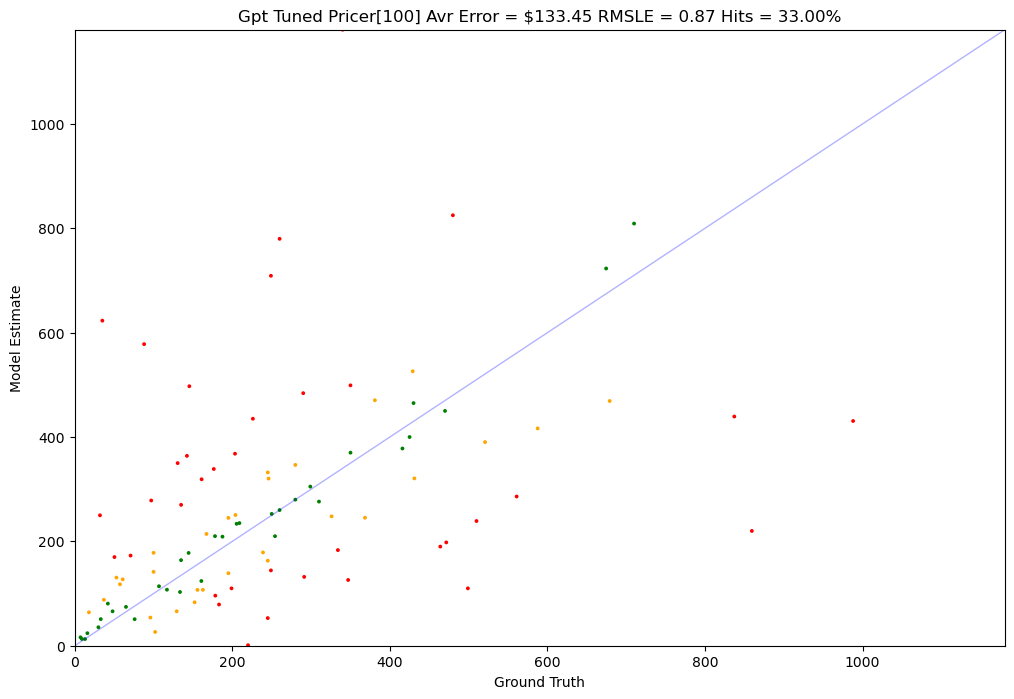

In [130]:
tester.test(gpt_tuned_pricer)